In [1]:
import pandas as pd
merged_standardized = pd.read_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/data/merge_standardized_dummy.parquet')
merged_normalized = pd.read_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/data/merge_normalized_dummy.parquet')
merged_data = pd.read_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/data/merge_filtred_dummy.parquet')
merged_default = pd.read_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/data/merge_filtred_default.parquet')

Código de Boa Noite faz com que a dimensionalidade seja levada em conta.

In [26]:
# merged_padronized = merged_data.div(merged_data.sum(axis=1), axis='rows')
# merged_padronized

,yellow_cards,red_cards,goals,suffered_goals,assists,club_name_1.fc union berlin,club_name_ac milan,club_name_aek athens,club_name_ajax amsterdam,club_name_arsenal fc,...,club_formation_4-4-1-1,club_formation_4-4-2,club_formation_4-4-2 Diamond,club_formation_4-4-2 double 6,club_formation_4-5-1,club_formation_4-5-1 flat,club_formation_5-3-2,club_formation_5-4-1,team_type_away,team_type_home
0,0.400000,0.0,0.400000,-0.800000,0.400000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.200000,0.000000
1,0.100000,0.0,0.400000,-0.200000,0.400000,0.0,0.0,0.0,0.0,0.0,...,0.1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.100000
2,0.416667,0.0,0.166667,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.083333,0.000000
3,0.666667,0.0,0.000000,-0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333333
4,0.066667,0.0,0.400000,-0.066667,0.400000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.066667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,0.000000,0.0,0.333333,-0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.000000
2219,0.285714,0.0,0.285714,-0.285714,0.285714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.142857,0.000000
2220,0.285714,0.0,0.285714,-0.285714,0.285714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.142857
2221,0.750000,0.0,0.000000,-0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.250000


# Elbow method to find optimal number of clusters

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [28]:
distortions = []
n_clusters = range(2, 15)
for n_clus in n_clusters:
    print(n_clus) 
    distortions.append(KMeans(n_clusters=n_clus,max_iter = 10_000, n_init = 100, random_state= 61658).fit(merged_standardized).inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14


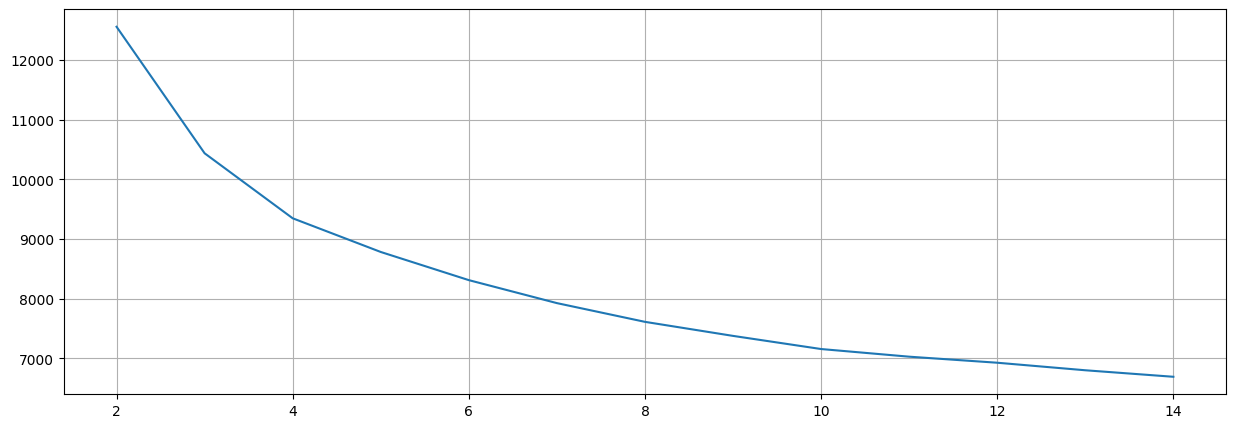

In [29]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

q:\Universidade\PISI3\pullebyte-analises\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Para n_clusters = 3, a pontuação média de silhouette é: 0.2107196010027287


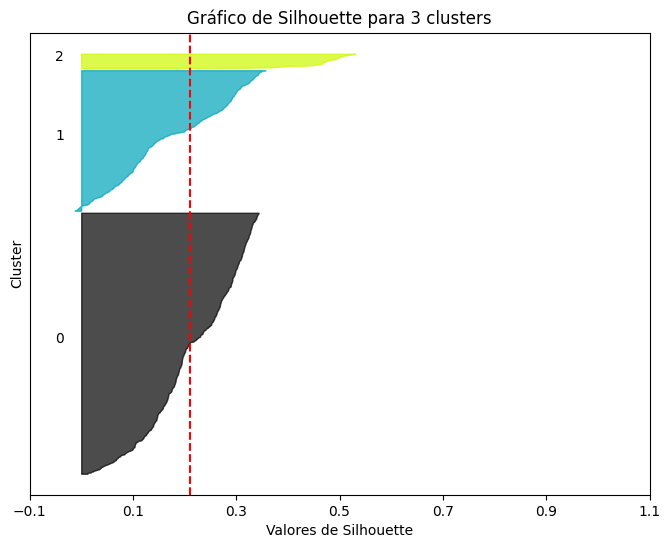

In [23]:
def plot_silhouette_analysis(df, n_clusters):
    # Ajustar o KMeans ao DataFrame df
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df)

    # Calcular a pontuação média de Silhouette
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, a pontuação média de silhouette é: {silhouette_avg}")

    # Calcular as pontuações de Silhouette para cada ponto
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    # Criar o gráfico de Silhouette
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    y_lower = 10
    for i in range(n_clusters):
        # Agregar as pontuações de silhouette para o cluster i e ordenar
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title(f"Gráfico de Silhouette para {n_clusters} clusters")
    ax1.set_xlabel("Valores de Silhouette")
    ax1.set_ylabel("Cluster")

    # Linha vertical para a pontuação média de silhouette de todos os valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Remover os ticks do eixo y
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

# Número de clusters desejado
n_clusters = 3  # Altere este valor para testar diferentes números de clusters

# Executar a função de análise de silhouette com o número de clusters especificado
plot_silhouette_analysis(merged_standardized, n_clusters)

In [30]:
km = KMeans(n_clusters=4,max_iter = 10_000, n_init = 100, random_state= 61658)
merged_padronized_cluster = km.fit_predict(merged_standardized)
merged_padronized_cluster

array([3, 3, 0, ..., 3, 0, 3])

In [31]:
merged_default['cluster'] = merged_padronized_cluster
merged_default.to_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/clustered-data/clustered_data.parquet')
merged_default

,club_name,club_formation,team_type,yellow_cards,red_cards,goals,suffered_goals,assists,cluster
0,Bayer 04 Leverkusen,4-3-3 Attacking,away,2,0,2,-4,2,3
1,manchester united,4-4-1-1,home,1,0,4,-2,4,3
2,Shakhtar Donetsk,4-2-3-1,away,5,0,2,0,2,0
3,real sociedad,4-3-3 Attacking,home,2,0,0,-2,0,1
4,Real Madrid,4-2-3-1,away,1,0,6,-1,6,3
...,...,...,...,...,...,...,...,...,...
2218,Bayern Munich,4-2-3-1,away,0,0,1,-2,1,1
2219,Real Madrid,4-4-2 double 6,away,2,0,2,-2,2,3
2220,bayern munich,4-2-3-1,home,2,0,2,-2,2,3
2221,borussia dortmund,4-3-3 Attacking,home,3,0,0,-2,0,0


In [32]:
import numpy as np
import locale

locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')

for col in merged_default.drop('cluster', axis=1).columns:
    if merged_default.dtypes[col] == object:
        for cl in np.sort(merged_default.cluster.unique()):
            vc = 100 * merged_default.loc[merged_default.cluster==cl, col].value_counts() / (merged_default.cluster==cl).sum()
            for cat, cnt in vc.reset_index().values:
                formatted_cnt = locale.format_string('%.2f', cnt, grouping=True)
                print(f'{cl:d}; {col}{str(cat):s}; {formatted_cnt} %', end='; \n')
    else:
        for cl in np.sort(merged_default.cluster.unique()):
            formatted_mean = locale.format_string('%.2f', merged_default.loc[merged_default.cluster==cl, col].mean(), grouping=True)
            print(f'{cl:d}; {col}; {formatted_mean}', end='; \n')


0; club_nameFC Barcelona; 3,65 %; 
0; club_nameParis Saint-Germain; 2,49 %; 
0; club_nameAtltico de Madrid; 2,49 %; 
0; club_nameManchester City; 2,33 %; 
0; club_nameparis saint-germain; 2,16 %; 
0; club_nameSL Benfica; 1,99 %; 
0; club_nameFC Porto; 1,99 %; 
0; club_namereal madrid; 1,66 %; 
0; club_nameBayern Munich; 1,66 %; 
0; club_nameInter Milan; 1,66 %; 
0; club_nameatltico de madrid; 1,66 %; 
0; club_namesporting cp; 1,50 %; 
0; club_namechelsea fc; 1,50 %; 
0; club_nameGalatasaray; 1,50 %; 
0; club_nameChelsea FC; 1,50 %; 
0; club_nameSevilla FC; 1,50 %; 
0; club_nameShakhtar Donetsk; 1,50 %; 
0; club_nameBayer 04 Leverkusen; 1,50 %; 
0; club_nameJuventus FC; 1,50 %; 
0; club_nameZenit St. Petersburg; 1,50 %; 
0; club_namejuventus fc; 1,33 %; 
0; club_nameAS Monaco; 1,33 %; 
0; club_nameajax amsterdam; 1,33 %; 
0; club_nameclub brugge kv; 1,33 %; 
0; club_nameinter milan; 1,33 %; 
0; club_nameClub Brugge KV; 1,33 %; 
0; club_nameAC Milan; 1,33 %; 
0; club_nameOlympiacos Pirae

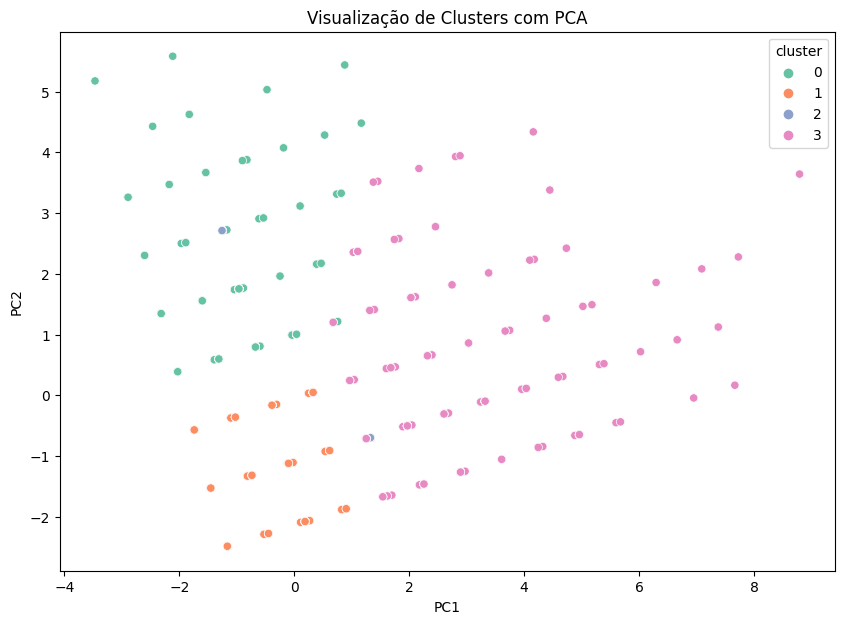

In [33]:
from sklearn.decomposition import PCA
import seaborn as sns

# Supondo que seu DataFrame seja merged_default
# Selecionando as colunas numéricas relevantes
X = merged_default[['yellow_cards', 'red_cards', 'goals', 'assists']]

# Aplicando PCA para reduzir a dimensionalidade para 2D
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# Criando um DataFrame com os componentes principais e os clusters
pca_merged_default = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_merged_default['cluster'] = merged_default['cluster']

# Visualizando os clusters em um gráfico de dispersão 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set2', data=pca_merged_default)
plt.title('Visualização de Clusters com PCA')
plt.show()


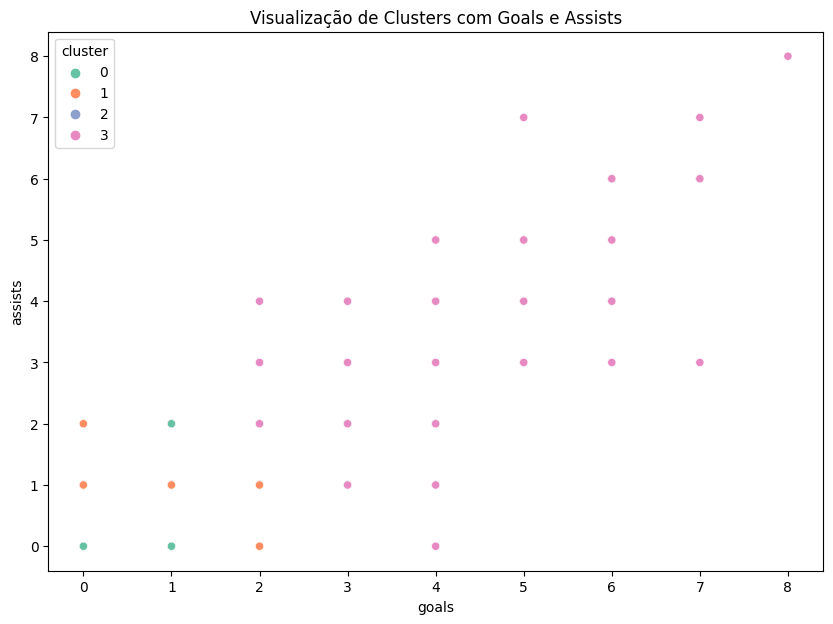

In [34]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='goals', y='assists', hue='cluster', palette='Set2', data=merged_default)
plt.title('Visualização de Clusters com Goals e Assists')
plt.show()


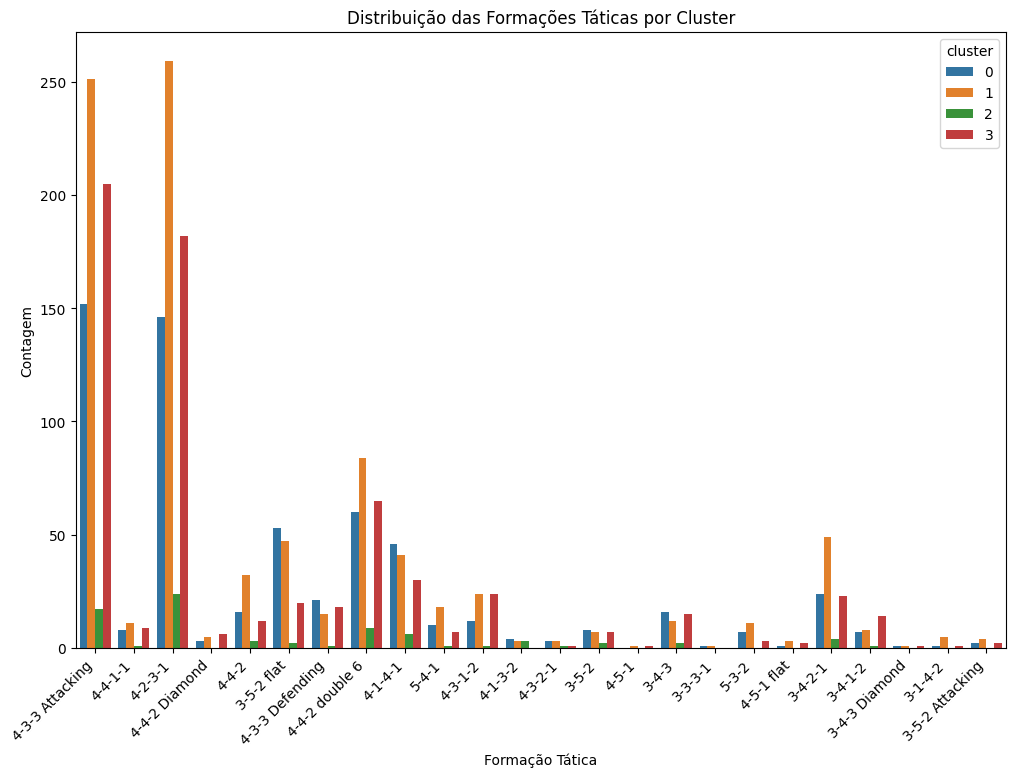

In [35]:
plt.figure(figsize=(12, 8))

# Criando um gráfico de barras que mostra a contagem de cada formação tática, colorido por cluster
sns.countplot(x='club_formation', hue='cluster', data=merged_default)

# Ajustando a rotação das labels do eixo x para melhor leitura
plt.xticks(rotation=45, ha='right')

plt.title('Distribuição das Formações Táticas por Cluster')
plt.xlabel('Formação Tática')
plt.ylabel('Contagem')

plt.show()